In [65]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_confusion_matrix

import matplotlib.pyplot as plt

import numpy as np
import string
import re
import spacy

import warnings; warnings.simplefilter('ignore')

In [66]:
imdb = pd.read_csv('IMDB Dataset.csv')[:5000]

*** ***

# Cleaning

In [88]:
def remove_br(string):
    raw_string = r"{}".format(string)
    new_str = re.sub("<br />", '', raw_string)
    pattern = r'\\'
    new_str = re.sub(pattern, '', new_str)
    new_str = new_str.lower()
    return new_str

In [89]:
no_br_reviews = [remove_br(review) for review in imdb['review']]

In [69]:
no_br_reviews[1]

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

In [70]:
imdb['no_br_strings'] = no_br_reviews

In [71]:
imdb.head()

,review,sentiment,no_br_strings
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is..."


**** ****
*** ***

# Tf

In [72]:
tf_vect = CountVectorizer(stop_words = ENGLISH_STOP_WORDS, max_features=5000)

In [73]:
X_tf = tf_vect.fit_transform(imdb['no_br_strings'], imdb['sentiment'])

In [74]:
df_tf = pd.DataFrame(X_tf.toarray(), columns=tf_vect.get_feature_names())
df_tf.head()

,000,10,100,11,12,13,13th,14,15,16,...,yesterday,york,young,younger,youth,zero,zoey,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Tf-Idf

*Bulding the matrix with the Td-Idf scores, the features of the machine learning models*

In [75]:
tfidf_vect = TfidfVectorizer(stop_words = ENGLISH_STOP_WORDS, max_features=5000)

In [76]:
X_tfidf = tfidf_vect.fit_transform(imdb['no_br_strings'], imdb['sentiment'])
y = imdb['sentiment']

In [77]:
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
df_tfidf.head()

,000,10,100,11,12,13,13th,14,15,16,...,yesterday,york,young,younger,youth,zero,zoey,zombie,zombies,zone
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.082603,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.062443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.223644,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.102777,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


*** ***

# Logistic Regression - Tf

In [126]:
X_tf = df_tf.copy() 

In [127]:
#Splitting the data

X_tf_train, X_tf_test, y_train, y_test = train_test_split(X_tf, y, test_size=0.2, random_state=42)

In [128]:
#Training

log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_tf_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
#Tuning 

from sklearn.model_selection import GridSearchCV
parameters = {
            'penalty':['l2'],
            'C':[0.01, 0.1, 1],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
        }
GS = GridSearchCV(log_reg, parameters,cv=10)
GS.fit(X_tf_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [130]:
print('Best parameters:', GS.best_params_)
print('Best score:', GS.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score: 0.84475


In [131]:
#Training with best parameters
log_reg = LogisticRegression(**GS.best_params_)
log_reg.fit(X_tf_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
#Prediction and score

y_pred = log_reg.predict(X_tf_test)

print('Accuracy Score =', accuracy_score(y_test, y_pred))
print('F1 score =', '%.3f' % f1_score(y_test, y_pred, average='macro'))
print('Precision =', '%.3f' % precision_score(y_test, y_pred, average='macro'))
print('Recall =', '%.3f' % recall_score(y_test, y_pred, average='macro'))

Accuracy Score = 0.862
F1 score = 0.862
Precision = 0.862
Recall = 0.863


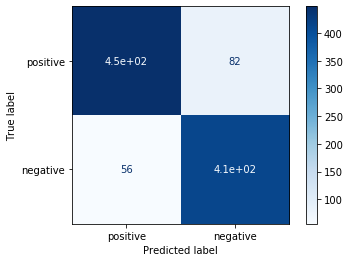

In [133]:
disp = plot_confusion_matrix(log_reg, X_tf_test, y_test,
                                 display_labels=['positive', 'negative'],
                                 cmap=plt.cm.Blues)

*** ***

# Logistic Regression - Tf-Idf

In [105]:
#Passing the dense matrix to the model

X = X_tfidf.copy() 

In [106]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [107]:
#Training

log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
#Tuning 

from sklearn.model_selection import GridSearchCV
parameters = {
            'penalty':['l2'],
            'C':[1,10,100],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
        }
GS = GridSearchCV(log_reg, parameters,cv=10,verbose=1)
GS.fit(X,y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   33.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=300, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [110]:
print('Best parameters:', GS.best_params_)
print('Best score:', GS.best_score_)

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score: 0.8598000000000001


*** ***

In [111]:
#Training with best parameters
log_reg = LogisticRegression(**GS.best_params_)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
#Prediction and score

y_pred = log_reg.predict(X_test)

print('Accuracy Score =', accuracy_score(y_test, y_pred))
print('F1 score =', '%.3f' % f1_score(y_test, y_pred, average='macro'))
print('Precision =', '%.3f' % precision_score(y_test, y_pred, average='macro'))
print('Recall =', '%.3f' % recall_score(y_test, y_pred, average='macro'))

Accuracy Score = 0.864
F1 score = 0.864
Precision = 0.865
Recall = 0.864


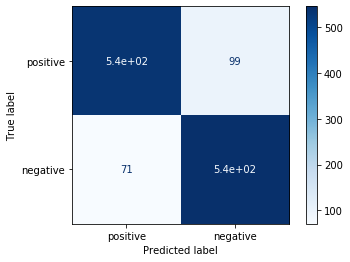

In [113]:
disp = plot_confusion_matrix(log_reg, X_test, y_test,
                                 display_labels=['positive', 'negative'],
                                 cmap=plt.cm.Blues)

*** ***

# Logistic Regression - Tf-Idf (With lemmatization)

In [114]:
def lemmas(string):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(string)
    lemmas = [token.lemma_ for token in doc]

    return ' '.join(lemmas)

In [115]:
imdb['lemmas'] = [lemmas(x) for x in imdb['no_br_strings']]

In [116]:
imdb['lemmas'][2]

'i think this be a wonderful way to spend time on a too hot summer weekend , sit in the air condition theater and watch a light - hearted comedy . the plot be simplistic , but the dialogue be witty and the character be likable ( even the well bread suspect serial killer ) . while some may be disappointed when -PRON- realize this be not match point 2 : risk addiction , i think -PRON- be proof that woody allen be still fully in control of the style many of -PRON- have grow to love.this be the most -PRON- \'d laugh at one of woody \'s comedy in year ( dare i say a decade ? ) . while -PRON- have never be impressed with scarlet johanson , in this -PRON- manage to tone down -PRON- " sexy " image and jump right into a average , but spirited young woman.this may not be the crown jewel of -PRON- career , but -PRON- be witty than " devil wear prada " and more interesting than " superman " a great comedy to go see with friend .'

In [117]:
tf_lemma_vect = CountVectorizer(stop_words = ENGLISH_STOP_WORDS, max_features=5000)
X_tf_lemma = tf_lemma_vect.fit_transform(imdb['lemmas'], imdb['sentiment'])
df_tf_lemma = pd.DataFrame(X_tf_lemma.toarray(), columns=tf_lemma_vect.get_feature_names())
df_tf_lemma.head()

,000,10,100,101,11,12,13,13th,14,15,...,youthful,youtube,yzma,zany,zero,zip,zoey,zombie,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
X_tf_lemma = df_tf_lemma.copy() 

In [119]:
#Splitting the data

X_tf_lemma_train, X_tf_lemma_test, y_train, y_test = train_test_split(X_tf_lemma, y, test_size=0.2, random_state=42)

In [120]:
#Training

log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_tf_lemma_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
#Tuning 

from sklearn.model_selection import GridSearchCV
parameters = {
            'penalty':['l2'],
            'C':[0.01, 0.1, 1, 100],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
        }
GS = GridSearchCV(log_reg, parameters,cv=10)
GS.fit(X_tf_lemma_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 100], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [122]:
print('Best parameters:', GS.best_params_)
print('Best score:', GS.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
Best score: 0.8465000000000001


In [123]:
#Training with best parameters
log_reg = LogisticRegression(**GS.best_params_)
log_reg.fit(X_tf_lemma_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
#Prediction and score

y_pred = log_reg.predict(X_tf_lemma_test)

print('Accuracy Score =', accuracy_score(y_test, y_pred))
print('F1 score =', '%.3f' % f1_score(y_test, y_pred, average='macro'))
print('Precision =', '%.3f' % precision_score(y_test, y_pred, average='macro'))
print('Recall =', '%.3f' % recall_score(y_test, y_pred, average='macro'))

Accuracy Score = 0.852
F1 score = 0.852
Precision = 0.852
Recall = 0.853


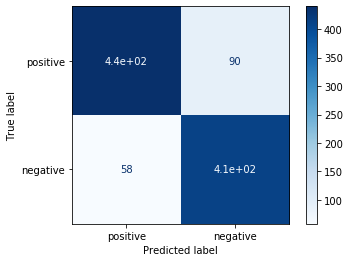

In [125]:
disp = plot_confusion_matrix(log_reg, X_tf_lemma_test, y_test,
                                 display_labels=['positive', 'negative'],
                                 cmap=plt.cm.Blues)

*** ***
*** ***

# Content Based Recommender

*The idea is to build a 'review recommender' that returns reviews similars to the input review. The tool can be used for clustering users, movie recommendations, topic modeling, etc*

In [48]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,neutral
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [177]:
#Building the cosine simmilarity matrix

cosine_similarities = linear_kernel(X, X)

In [202]:
#List of similiarities scores (Review 3)

sim_scores = list(enumerate(cosine_similarities[3]))
sim_scores[:20]

[(0, 0.013257008608555986),
 (1, 0.01356644478406045),
 (2, 0.0022480557888732437),
 (3, 1.0000000000000004),
 (4, 0.013769226758691194),
 (5, 0.01901123628297709),
 (6, 0.009093698114802174),
 (7, 0.006479039585715199),
 (8, 0.018246089087183445),
 (9, 0.02456206912382156),
 (10, 0.03683358266993418),
 (11, 0.013504952975059943),
 (12, 0.02762853336157901),
 (13, 0.029914162899998053),
 (14, 0.024581674585655706),
 (15, 0.027527806646368648),
 (16, 0.022441955267229603),
 (17, 0.0326790449811334),
 (18, 0.02314954832027493),
 (19, 0.0212305404865984)]

In [180]:
#The 10 highest similarities

sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[:11]
sim_scores

[(3, 1.0000000000000002),
 (4635, 0.3420181053856195),
 (1476, 0.3290418558155839),
 (418, 0.3243037345590046),
 (1137, 0.32318123698806706),
 (259, 0.3219048514001504),
 (4525, 0.3057911870240598),
 (787, 0.3045910083090193),
 (126, 0.30279953018473915),
 (3890, 0.30004357634490153),
 (1664, 0.29954172010369284)]

In [181]:
#Getting the indices of the most similar reviews

top_ten_idx = [i[0] for i in sim_scores][1:]
top_ten_idx

[4635, 1476, 418, 1137, 259, 4525, 787, 126, 3890, 1664]

In [94]:
# Base review - The input
print(imdb.iloc[3]['no_br_strings'])

basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them.


<br>

*The recommendations. We can see that the reviews are similar, related to "zombie movies".*

In [91]:
#Reccomendation #1

print(imdb.iloc[4635]['no_br_strings'])

anyone who has experienced the terrors of divorce will empathize with this indie film's protagonist, a scared little boy who believes a zombie is hiding in his closet. is jake (a mesmerizing anthony demarco) simply "transferring" the trauma of two bickering parents to an understandable image? or could the creature be real? writer/director shelli ryan neatly balances both possibilities and keeps the audience guessing. her choice of using one setting - a suburban house - adds to the feeling of desperation and claustrophobia.brooke bloom and peter sean bridgers are highly convincing as the angry, but loving parents. however it is the creepy minor characters, mrs. bender(barbara gruen), an unhinged babysitter and sam stone (ben bode), a sleazy real estate agent that linger in the mind. jake's closet is a darkly inspired portrait of childhood as a special kind of hell.


In [92]:
#Recommendatio #2

imdb.iloc[1476]['no_br_strings']

'last weekend i bought this \'zombie movie\' from the bargain bin and watched it with some friends thinking it was going to be a budget version of "land of the dead".boy, was i wrong. it seems as if they spent a good portion of their budget on the cover-art, which is very misleading to fans of the zombie genre.we watched up to the point where the zombie chicks come alive and get in the car with some yuppie who is out in the middle of nowhere talking business on a cell-phone. they actually speak to the guy before one of the girls kills him; but once they started driving the car, i couldn\'t suspend my disbelief anymore.some people actually consider this a "so bad, it\'s good" movie, they are liars. i didn\'t finish the movie, but one of the other reviews mention that they actually somehow become police officers at the end of the movie, which makes me glad to not have watched it all the way through.this is even worse than "zombiez" do not watch!'

In [93]:
#Recommendation #3

imdb.iloc[418]['no_br_strings']

'okay, i\'ve watched this movie twice now, i have researched it heavily on the net, i have asked several people on there opinions. i have even gone to the length of reading the original sheridan lafanu classic \'carmilla\', a book that this movie is supposed to be based on. i feel that the best way to review this movie is to describe a game to play whilst watching it. as the plot of the movie doesn\'t seem to make any sense at all, here is the plot of the book.laura lives in a castle in syberia with her father, mr de lafontaine. they carry on with their lives blissfully and peacefully. one day they get a letter from the \'general\' a man who has made it his mission in life to avenge his daughters death. he makes claims of supernatural powers being at work, and explains that he will visit them soon. meanwhile, a chance encounter with a strange woman results in the lafontaines looking after her daughter, carmilla, for several months. soon laura starts to be overwhelmed by strange dreams,